In [82]:
import pandas as pd

# load dataset
df = pd.read_excel("base/dados_tratados_heart.xlsx")
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


### Explorar os dados (EDA - Análise Exploratória)

In [83]:
df.head()
# Checar valores ausentes
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Seleção de recurso

🔹 Variáveis independentes (features):
São as colunas que você usa como base para prever a target.

🔹 Variável dependente (target):
A variável que você quer prever — neste caso, se a pessoa tem ou não doença cardíaca

In [84]:
X = df.drop("HeartDisease", axis=1)  # remove a coluna target, fica só com as features
y = df["HeartDisease"]  # pega só a coluna target para prever

In [85]:
# Checar valores ausentes
print(df.isnull().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Divisão de dados e Padronização dos dados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), columns=X_test.columns, index=X_test.index
)

## Desenvolvimento e previsão de modelos

In [87]:
from sklearn.linear_model import LogisticRegression

# instancia o modelo (usando os parâmetros padrão)
logreg = LogisticRegression(random_state=16, max_iter=1000)

# ajuste o modelo com dados
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

In [88]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 86,  22],
       [ 14, 108]])

Text(0.5, 427.9555555555555, 'Predicted label')

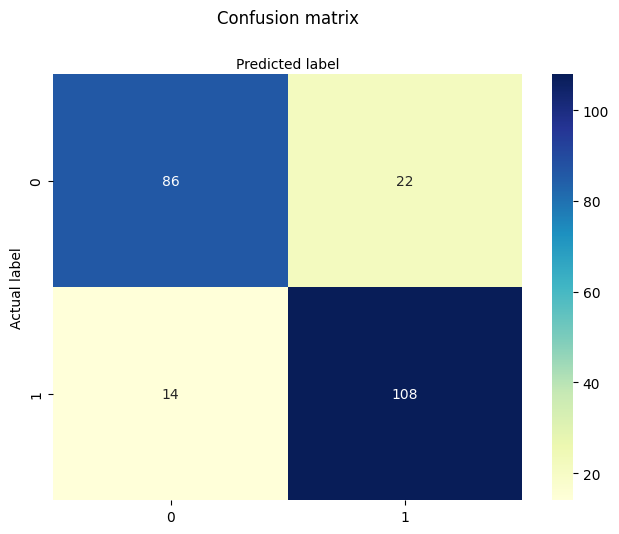

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

class_names = [0, 1]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

## Métricas de avaliação da matriz de confusão

In [90]:
from sklearn.metrics import classification_report

target_names = ["Without HeartDisease", "With HeartDisease"]
print(classification_report(y_test, y_pred, target_names=target_names))

                      precision    recall  f1-score   support

Without HeartDisease       0.86      0.80      0.83       108
   With HeartDisease       0.83      0.89      0.86       122

            accuracy                           0.84       230
           macro avg       0.85      0.84      0.84       230
        weighted avg       0.84      0.84      0.84       230



Curva ROC
A curva ROC (Receiver Operating Characteristic, característica operacional do receptor) é um gráfico da taxa de verdadeiros positivos em relação à taxa de falsos positivos. Ele mostra a troca entre sensibilidade e especificidade.

A pontuação AUC para o caso é de 0,89. A pontuação AUC 1 representa um classificador perfeito, e 0,5 representa um classificador inútil.

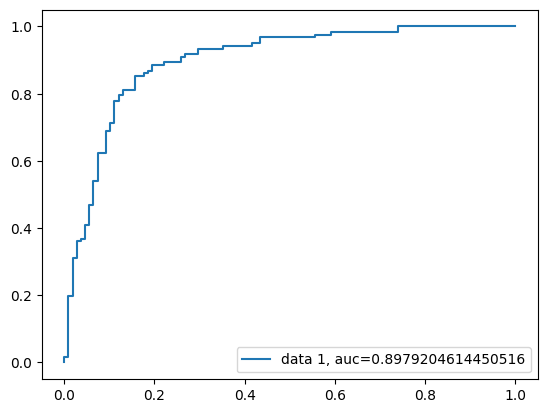

In [91]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()